In [4]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
centroids = [(-5,-5),(5,5),(-2.5,2.5),(2.5,-2.5)]
cluster_std = [1,1,1,1]

X,y = make_blobs(n_samples=100,cluster_std=cluster_std, centers = centroids, n_features=2, random_state=2)

[[-5.3135082  -4.22898826]
 [ 4.34674973  5.84245628]
 [-4.49711858 -6.24528809]
 [ 5.69511961  2.96653345]
 [ 2.86505352 -1.72591797]
 [-5.26905696 -2.76863321]
 [-7.1361961  -3.35972919]
 [-1.70082     3.76261366]
 [ 2.95967695  5.04625552]
 [ 2.89652016 -2.81461744]
 [ 3.61788673 -2.77424209]
 [ 6.60869262 -1.67887912]
 [-4.49814279 -5.8442137 ]
 [ 3.11014409 -2.0765031 ]
 [ 1.04663565 -2.83801778]
 [ 4.03176032 -4.48584577]
 [-2.82504963  1.93976549]
 [ 5.82470301  6.24821292]
 [ 4.53799465  5.35088849]
 [ 4.32232442  3.56056097]
 [ 6.36723542  6.21788563]
 [ 5.38186623  5.56627544]
 [ 2.27175244 -4.56961226]
 [-4.44854596 -2.70779199]
 [ 3.46078194 -1.74162965]
 [-5.0191305  -3.82499878]
 [ 2.03165374 -3.75472031]
 [-6.42121723 -5.1534952 ]
 [ 4.61848352  5.06648901]
 [-2.00205985  2.62650418]
 [ 2.85913333 -1.87777959]
 [-3.21925384  1.91658541]
 [-6.05795222 -5.90900761]
 [ 4.96042976  5.32600343]
 [-5.33882197 -5.23618403]
 [-4.99999024 -4.45764743]
 [ 1.90624442 -1.35049943]
 

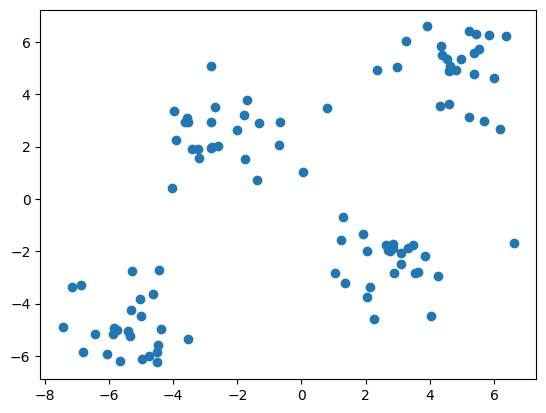

In [5]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [6]:
#define class and take no of clusters and max iterations for the algo
#make a func fit_predict where assign random centroids, move centroids and check if finished or not

In [20]:
import random
import numpy as np
class KMeans:
  def __init__(self, n_clusters = 2, max_iter = 100):
    self.n_clusters = n_clusters
    self.max_iter = max_iter
    self.centroids = None
  def fit_predict(self, X):
    #SELECT RANDOM CENTROIDS
    random_index = random.sample(range(0,X.shape[0]), self.n_clusters)
    self.centroids = X[random_index]
    for i in range(self.max_iter):
      #ASSIGN CLUSTERS
      cluster_group = self.assign_clusters(X)
      old_centroids = self.centroids
      #MOVE CENTROIDS
      self.centroids = self.move_centroids(X, cluster_group)
      #CHECK IF FINISHED
      if(old_centroids == self.centroids).all():
        break
    return cluster_group
  def assign_clusters(self, X):
    distances = []
    cluster_group=[]

    for row in X:
      for centroid in self.centroids:
        distances.append(np.sqrt(np.dot((row-centroid), (row-centroid))))
      min_index = min(distances)
      index_pos = distances.index(min_index)
      cluster_group.append(index_pos)
      distances.clear()

    return np.array(cluster_group)

  def move_centroids(self, X, cluster_group):
    new_centroids=[]
    centroid_type = np.unique(cluster_group)
    for type in centroid_type:
      new_centroids.append(X[cluster_group==type].mean(axis=0))


    return np.array(new_centroids)

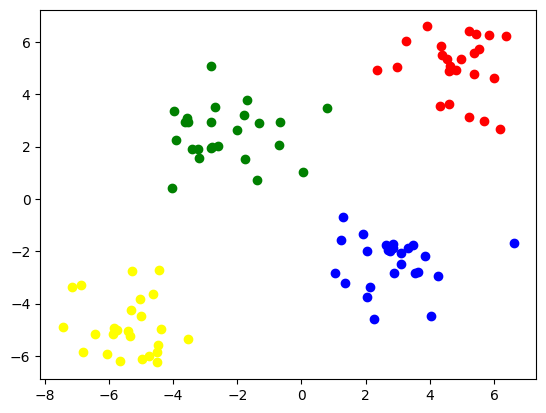

In [29]:
km = KMeans(n_clusters = 4, max_iter=100)
y_means = km.fit_predict(X)
plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='red')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='blue')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color='green')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],color='yellow')

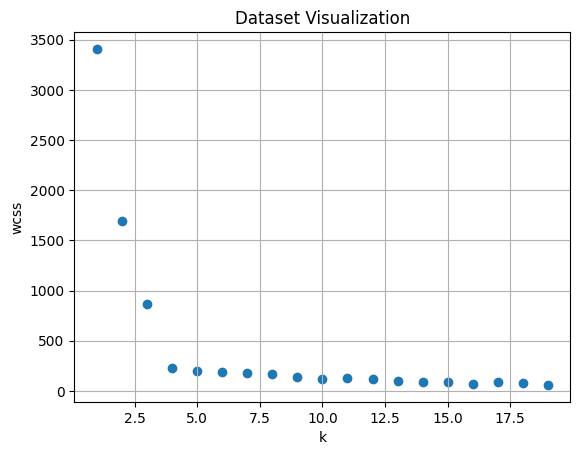

In [37]:
def k_clustering(X):
  wcss=[]
  for k in range(1,20):
    km = KMeans(n_clusters = k, max_iter=100)
    y_means = km.fit_predict(X)
    y_means = np.array(y_means)
    centroids = km.centroids
    wcss_sum = 0
    for i in range(k):
        cluster_points = X[y_means == i]
        centroid = centroids[i]
        squared_distances = np.sum((cluster_points - centroid) ** 2)
        wcss_sum += squared_distances
    wcss.append(wcss_sum)
  return wcss
wcss = k_clustering(X)
k_clusters = [i for i in range(1,20)]
plt.scatter(y=wcss, x=k_clusters)
# plt.xlim([0, 20])
# plt.ylim([0, 10])
plt.title('Dataset Visualization')
plt.xlabel('k')
plt.ylabel('wcss')
plt.grid()
plt.show()